<a href="https://colab.research.google.com/github/shazam-25/Simplify_ML/blob/main/guassian_mixture_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from matplotlib.patches import Ellipse

In [2]:
# Generate sample data
X, y_true = make_blobs(n_samples=400, centers=3, cluster_std=1.0, random_state=42)

In [3]:
# Fit GMM
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)

# Predict
y_gmm = gmm.predict(X)

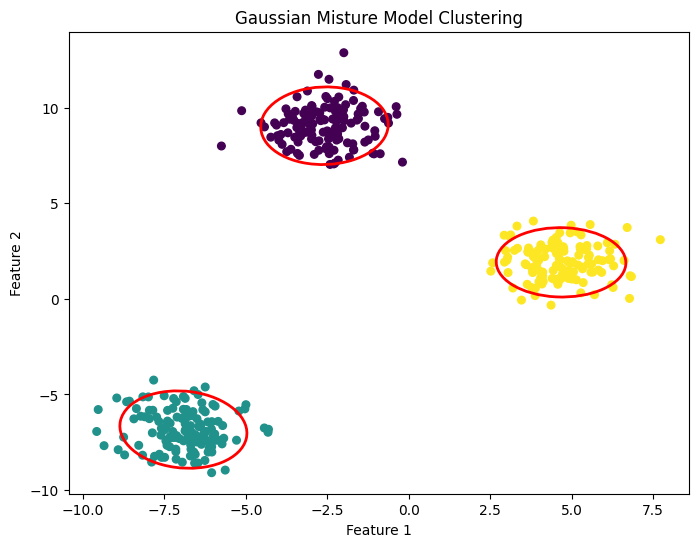

In [4]:
# Plot data points with cluster assignments
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_gmm, s=30, cmap='viridis', label='Data points')

# Plot ellipses for Gaussian components (scaled to cluster spread)
for i in range(gmm.n_components):
  mean = gmm.means_[i]
  cov = gmm.covariances_[i]
  eigenvalues, eigenvectors = np.linalg.eigh(cov)

  # Scale the ellipse by 2 standard deviations (covers ~95% of points)
  scale_factor = 2
  width, height = 2 * scale_factor * np.sqrt(eigenvalues)
  angle = np.degrees(np.arctan2(*eigenvectors[:,0][::-1]))

  ellip = Ellipse(xy=mean, width=width, height=height, angle=angle,
                  edgecolor='red', fc='None', lw=2)
  plt.gca().add_patch(ellip)

plt.title('Gaussian Misture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()